#### Wireless Power Transfer - Projeto de Eletromagnetismo e Ondulatória

Integrantes: Beatriz Rodrigues, Carlos Eduardo, Ellen Coutinho e Rafael Dourado

---

Esse projeto tem por objetivo alimentar uma carga por meio de um sistema capaz de transmitir energia pelo ar. O método utilizado para isso é o de **acoplamento ressonante por campos próximos**. 

O fenômeno da ressonância ocorre quando a frequência de excitação é igual a frequência natural, o que maximiza a corrente. O circuito utilizado pode ser visualizado a seguir:


![Circuito](circuito.png)

---

##### Simulação

Considera-se as seguintes condições:
- $R_1=0,5\Omega$
- $R_2=0,5\Omega$
- $R_c=400\Omega$
- $L_1=300 mH$ 
- $L_2=300 mH$
- $f=60Hz$
- $k=0,5$
- $V_1(t)=50\cdot cos(\omega \cdot t)\space [V]$

In [20]:
# Bibliotecas
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Variáveis
R1 = R2 = 0.5
L1 = L2 = 300e-6
C1 = C2 = 0.1e-6
f = 60
omega = 2*pi*f
XL1 = L1*omega*1j
XL2 = L2*omega*1j
XC1 = XC2 = 1/(C1*omega*1j)


In [22]:
# Funções
def encontra_L(f, C):
    # Retorna L (µ𝐻)
    return (1/((2*pi*f)**2*C))*1e6

def CalcularTransformador(v1, Rc, XM) -> tuple[complex, complex]:
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+Rc/((Rc/XC2)+1)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [23]:
M = sqrt(L1*L2)
XM = M*omega*1j
k = 0.5
Rc = 400
XM_k = k*XM

i1, i2 = CalcularTransformador(50, Rc, XM)
print(f"i1 transformador: {abs(i1)}, {phase(i1)}")
print(f"i2 transformador: {abs(i2)}, {phase(i2)}")

i1 transformador: 0.0018849636287136826, 1.5707774759545738
i2 transformador: 5.323583007464599e-07, -3.1268342202001995


Nesse caso, a indutância mútua é multiplicada pelo fator k porque apenas parte do fluxo magnético produzido por uma das bobinas chega à outra.

**Como I1 e I2 variam em função da frequência?**

frequência de ressonância estimada: (29057.584156627367+0j)


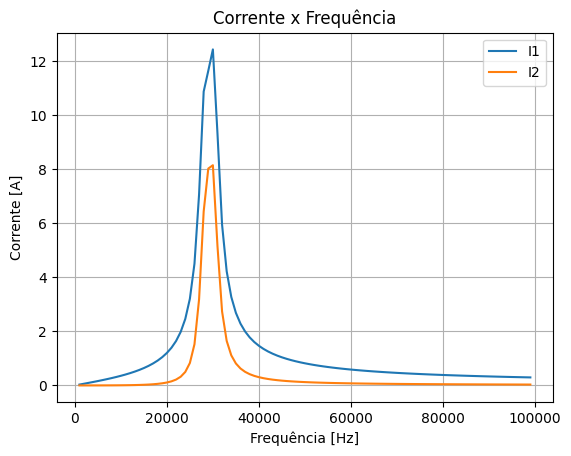

In [25]:
print(f"frequência de ressonância estimada: {sqrt(1/(L1*C1))/(2*pi)}")

lista_f = np.arange(1000, 100e3, 1000)
lista_i1 = []
lista_i2 = []

for f in lista_f:
    w = 2*pi*f
    XL1 = XL2 = L1*w*1j
    XM = M*w*1j
    XC1 = XC2 = 1/(C1*w*1j)
    XM_k = 0.1*XM
    i1, i2 = CalcularTransformador(50, Rc, XM_k)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))

f_res = lista_f[list(lista_i2).index(max(lista_i2))]
plt.plot(lista_f, lista_i1, label = "I1")
plt.plot(lista_f, lista_i2, label = "I2")
plt.title("Corrente x Frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corrente [A]")
plt.legend()
plt.grid()
plt.show()

Conforme explicado no início, ambas as correntes são máximas na frequência de ressonância.

Ao variar o k, visualiza-se o seguinte comportamento:

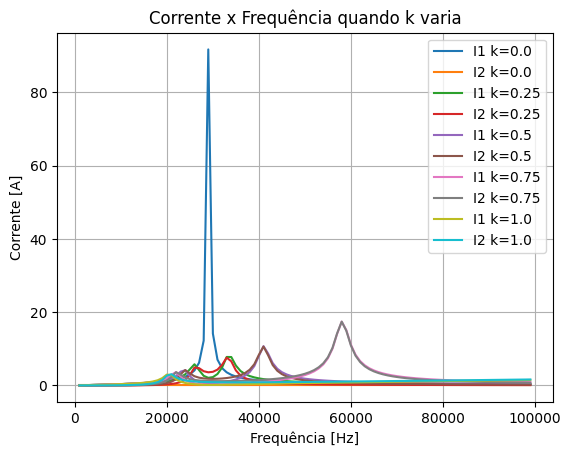

In [28]:
lista_k = np.linspace(0,1,5)

for k in lista_k:
    lista_i1 = []
    lista_i2 = []
    for f in lista_f:
        w = 2*pi*f
        XL1 = XL2 = L1*w*1j
        XM = M*w*1j
        XC1 = XC2 = 1/(C1*w*1j)
        XM_k = k*XM
        i1, i2 = CalcularTransformador(50, Rc, XM_k)
        lista_i1.append(abs(i1))
        lista_i2.append(abs(i2))
    plt.plot(lista_f, lista_i1, label = f"I1 k={k}")
    plt.plot(lista_f, lista_i2, label = f"I2 k={k}")
plt.title("Corrente x Frequência quando k varia")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corrente [A]")
plt.grid()
plt.legend()
plt.show()

[Explicação]

**Como a indutância influencia no gráfico do módulo da tensão V2 em função da frequência de ressonância?**

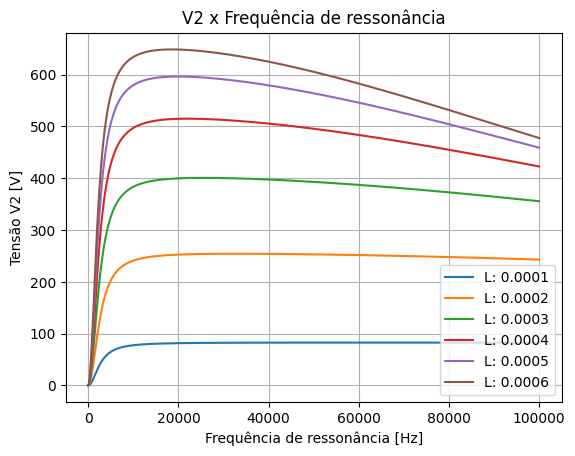

In [33]:
lista_L = np.linspace(50e-6, 600e-6, 6)
lista_fr = np.linspace(1, 100e3, 1000)
Rc = 400

for L in lista_L:
    lista_V2 = []
    for fr in lista_fr:
        w = 2*pi*fr
        C = 1/(L*(2*pi*fr)**2)
        XC1 = XC2 = 1/(C*1j*w)
        XL1 = XL2 = L*w*1j
        XM_k = 0.1*M*w*1j
        i1, i2 = CalcularTransformador(50, Rc, XM_k)
        i4 = i2/((Rc/XC2)+1)
        lista_V2.append(Rc*i4)
    plt.plot(lista_fr, lista_V2, label = f"L: {L:.4f}")
plt.xlabel("Frequência de ressonância [Hz]")
plt.ylabel("Tensão V2 [V]")
plt.title("V2 x Frequência de ressonância")
plt.legend()
plt.grid()
plt.show()

Quanto maior a indutância, maior a amplitude máxima de V2 e o sistema se torna menos estável.

**Como a frequência escolhida modifica a relação entre a potência de entrada e saída (eficiência)?**

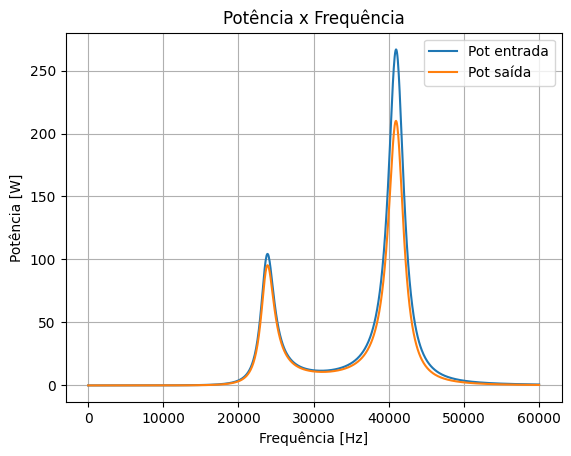

In [39]:
lista_f = np.linspace(10, 60e3, 1000)
lista_Pe = []
lista_Ps = []
V1 = 50
k = 0.5
for f in lista_f:
    w = 2*pi*f
    XC1 = XC2 = 1/(C1*1j*w)
    XL1 = XL2 = L1*w*1j
    XM_k = k*M*w*1j
    i1, i2 = CalcularTransformador(V1, Rc, XM_k)
    i4 = i2/((Rc/XC2)+1)
    Pe = (V1*(i1.conjugate())/2).real
    lista_Pe.append(Pe)
    Ps = (Rc*abs(i4)**2).real/2
    lista_Ps.append(Ps)

plt.plot(lista_f, lista_Pe, label = "Pot entrada")
plt.plot(lista_f, lista_Ps, label = "Pot saída")
plt.title("Potência x Frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Potência [W]")
plt.grid()
plt.legend()
plt.show()

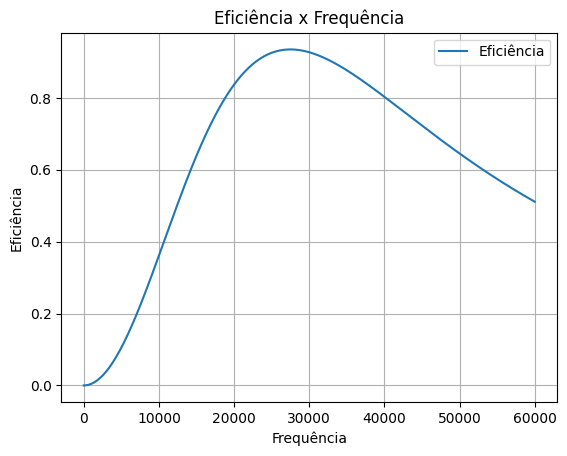

In [45]:
lista_efic = [lista_Ps[i]/lista_Pe[i] for i in range(len(lista_f))]

plt.plot(lista_f, lista_efic, label = "Eficiência")
plt.title("Eficiência x Frequência")
plt.xlabel("Frequência")
plt.ylabel("Eficiência")
plt.grid()
plt.legend()
plt.show()

Por ambos os gráficos, é possível notar que a eficiência máxima ocorre na frequência de ressonância.

**Como o pico da tensão V2 é afetado pelo coeficiente de acoplamento k?**

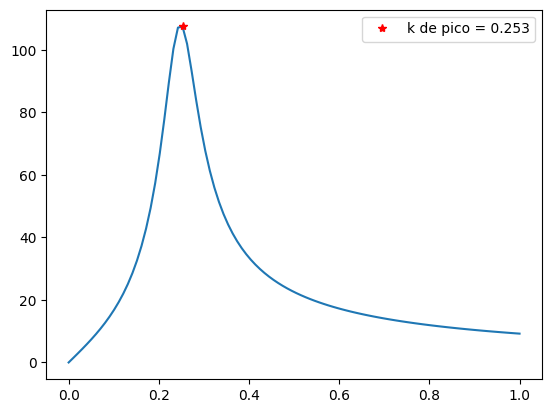

In [46]:
Rc = 10
w = 2*pi*f_res
XL1 = XL2 = L1*w*1j
XC1 = XC2 = 1/(C1*w*1j)
XM = sqrt(L1*L2)*w*1j
lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador(50,Rc, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))
pico_idx = lista_V2.index(max(lista_V2))
k_top = lista_k[pico_idx]
plt.plot(lista_k, lista_V2)
plt.plot(k_top, max(lista_V2), '*r',label=f'k de pico = {k_top:.3f}')
plt.legend()
plt.show()


**Como R1 pode afetar as potências?**

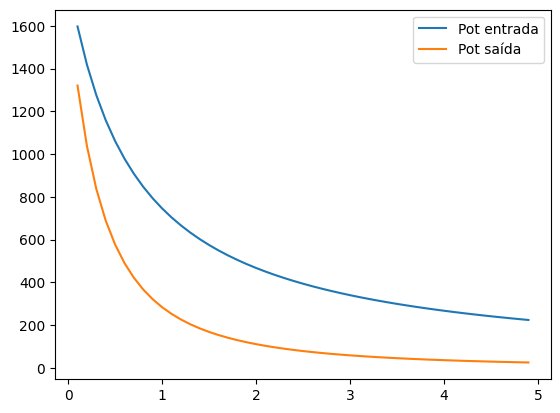

In [48]:
lista_r1 = np.arange(0.1, 5, 0.1)
lista_Pe = []
lista_Ps = []
for R1 in lista_r1:
    i1, i2 = CalcularTransformador(V1, Rc, k_top*XM)
    i4 = i2/((Rc/XC2)+1)
    Pe = (V1*(i1.conjugate())/2).real
    lista_Pe.append(Pe)
    Ps = (Rc*abs(i4)**2).real/2
    lista_Ps.append(Ps)

plt.plot(lista_r1, lista_Pe, label = "Pot entrada")
plt.plot(lista_r1, lista_Ps, label = "Pot saída")
plt.legend()
plt.show()

Percebe-se que a resistência associada ao uso de jumpers é influente para modificar os resultados do modelo.

---
##### Alterações com os dados do circuito físico

In [52]:
def encontra_L(f, C):
    # Retorna L (µ𝐻)
    return (1/((2*pi*f)**2*C))*1e6

C = 0.47e-6
f = 30000
L = encontra_L(f, C)
print(f'L escolhido {L:.2f} [µ𝐻] ')

L escolhido 59.88 [µ𝐻] 


In [53]:
C1 = C2 = C
L1 = 67.45e-6
L2 = 67.13e-6
V = 9
Rmenor = 0.4
Rmaior = Rmenor*2
R1 = 353.0e-3 + Rmaior
R2 = 377.7e-3 + Rmenor
Rc = 10.4 

w = 2*pi*f
M = sqrt(L1*L2)
XL1 = L1*w*1j
XL2 = L2*w*1j
XM = M*w*1j

XC1 = 1/(C1*w*1j)
XC2 = 1/(C2*w*1j)

O ajuste na resistência do jumper foi feito para aproximar o modelo computacional dos resultados obtidos experimentalmente. Há mais jumpers e componentes na parte esquerda do circuito (exibido anteriormente), por esse motivo sua resistência somada é maior. 

In [54]:
def CalcularTransformador(v1, Rc, XM) -> tuple[complex, complex]:
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+Rc/((Rc/XC2)+1)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

i1, i2 = CalcularTransformador((2/pi)*V, 10, XM)
print(i1)
print(i2)

(0.26105280407551645+0.2503442893765978j)
(0.05211543620585744+0.4561465458117497j)


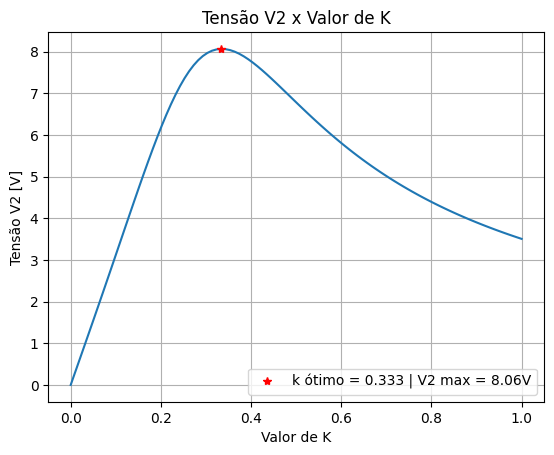

V2 de pico 8.06 V


In [55]:
lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador((2/pi)*V, Rc, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))
pico_idx = lista_V2.index(max(lista_V2))
k_top = lista_k[pico_idx]
plt.plot(lista_k, lista_V2)
plt.plot(k_top, max(lista_V2), '*r',label=f'k ótimo = {k_top:.3f} | V2 max = {max(lista_V2):.2f}V')
plt.legend()
plt.xlabel('Valor de K')
plt.ylabel('Tensão V2 [V]')
plt.title('Tensão V2 x Valor de K')
plt.grid()
plt.show()

print(f'V2 de pico {lista_V2[pico_idx]:.2f} V')

In [58]:
# Potência transmitida
V2_eficaz = 8/sqrt(2)
P_transmitida = (V2_eficaz**2)/Rc
print(f'Potência Transmitida: {P_transmitida.real:.2f} W')

# Potência de entrada
V1_eficaz = 9
P_entrada = (V1*(i1.conjugate())/2).real
print(f'Potência de Entrada: {P_entrada.real:.2f} W')

Potência Transmitida: 3.08 W
Potência de Entrada: 6.50 W


O que é necessário colocar ainda:
- Eficiencia (potencia de saida/potencia de entrada)
- Aplicações: o que pode ser feito com a potência que encontramos (talvez apenas nos slides)
- Gráficos da simulação agora validando o modelo físico
